# Homework 3: Mining Data Streams
Authors: Eva Engel & Tori Leatherman\
28th November 2022

## Task

We implement spectral clustering described in the paper "On Spectral Clustering: Analysis and an algorithm" by Andrew Y. Ng, Michael I. Jordan, and Yair Weiss. Given a graph or a similar data structure that allows for a comparison of affinity, the algorithm clusters the points using eigenvectors of a matrix *A* derived from the data strucutre. The approach presented in the paper derives the matrix *A* from the euclidean distance between points. However, the matrix *A* of the two example graphs used in this notebook are based on an adjacency matriy. In order to obtain clusters, we can either manually choose _k_ as the number of clusters or obtain the optimal number of clusters by examining the change of eigenvalues and picking the largest eigengap and corresponding eigenvector. TODO \
The algorithm can be divided into the following subproblems:

1.  We first form the adjacency matrix *A* using the provided edge lists.
2. We then define *D* to be the diagonal matrix whose elements on the diagonal are the sum of the ith row of the adjacency matrix *A*, and we create the Laplacian matrix L=D^(-1/2)AD^(-1/2).
3a. Select the *k* eigenvectors with the largest eigenvalues.
3b. Compute the maximal eigengap and select the corresponding largest eigenvectors up until the eigengap.
4. Form a matrix *X* from the eigenvectors and normalise it to obtain a matrix *Y*.
5. Apply K-means to cluster matrix *Y*.


## Set up

pip install -r /path/to/requirements.txt

### Import

In [1]:
import os

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

from dataset_reader import read_graph
from spectral_clustering import Spectral_clustering
sns.set_style('whitegrid')

### Data Set - Graph 1

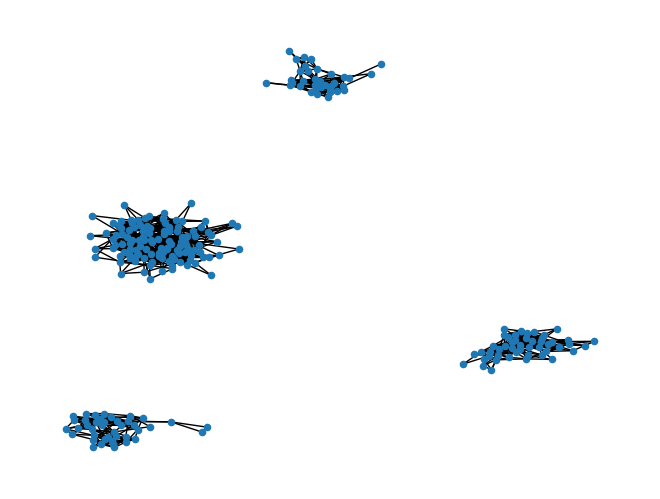

In [2]:
dataset_file_1 = 'example1.dat'
Graph_1 = read_graph(dataset_file_1)

nx.draw(Graph_1, node_size=20)
plt.show()

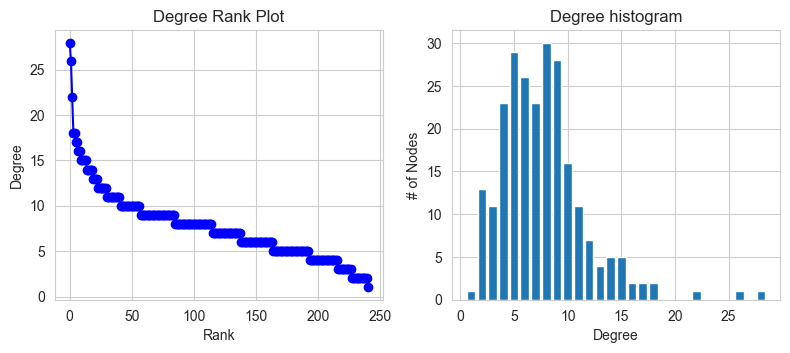

In [3]:
degree_sequence = sorted((d for n, d in Graph_1.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [4]:
clustering = Spectral_clustering(Graph_1)
classes, adjacency_matrix = clustering.spectral_clustering(get_optimal_k = True)

The optimal number of clusters is 3.


/Users/evaengel/ID2222_Data_Mining_Github/graph_spectra_clustering/src/spectral_clustering.py:74: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (237). Possibly due to duplicate points in X.
  result = KMeans(n_clusters=k).fit(Y).labels_


In [5]:
_, fiedler = clustering.compute_Fiedler()


Text(0, 0.5, 'Eigenvector')

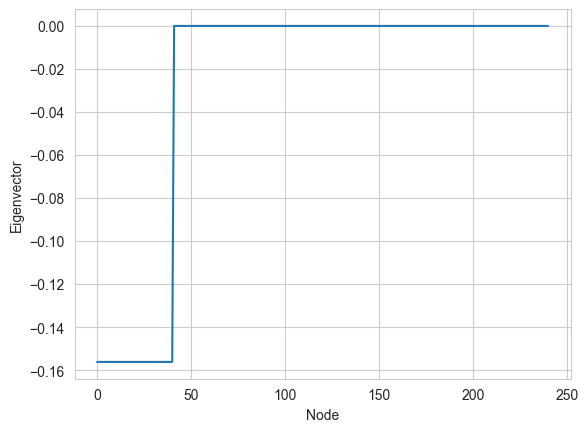

In [7]:
plt.plot(np.sort(fiedler))
plt.xlabel("Node")
plt.ylabel("Eigenvector")

In [12]:
len(fiedler)

241

TODO everything else